In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline

(100, 2)


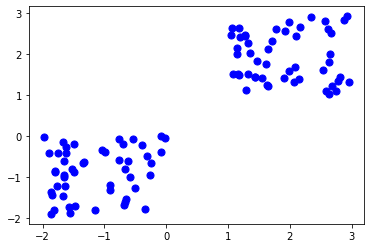

In [2]:
X= -2 * np.random.rand(100,2)
print(X.shape)
X1 = 1 + 2 * np.random.rand(50,2)
X[50:100, :] = X1
plt.scatter(X[ : , 0], X[ :, 1], s = 50, c = "b")
plt.show()

In [3]:
from sklearn.cluster import KMeans
Kmean = KMeans(n_clusters=2)
Kmean.fit(X)

KMeans(n_clusters=2)

In [4]:
import utils

In [5]:
x , roi = utils.readMRIFile("/Users/niva.ranavat/UCI Research/Data/SAL_01",200)
corr = utils.createCorrelationMatrix(roi,"pearson")
corr.shape

(150, 150)

In [6]:
Kmean = KMeans(n_clusters = 15)
Kmean.fit(corr)

KMeans(n_clusters=15)

In [7]:
fig = plt.figure()
labels = Kmean.labels_
labels

array([ 5, 10,  3,  8,  5, 12,  4,  7,  4,  5,  2, 14,  7,  9,  4, 12, 12,
       13, 11, 11, 10, 11, 14,  0,  5, 12,  2, 14, 10,  9, 12, 10,  6, 10,
       13,  6,  3,  8, 14, 11,  2,  1, 10,  1, 14,  0, 12,  1,  5,  5, 13,
        0,  2, 10,  4,  4,  9,  2,  8,  6,  5,  8,  2, 14,  3,  0,  2,  2,
        2, 12,  5,  4,  5,  3, 13,  7, 12,  6, 10,  4,  2,  3, 12,  7,  3,
        1,  1, 11,  6,  3,  1,  7,  7,  9,  5,  4,  9,  9,  6, 12,  5,  5,
        2, 13,  3, 12,  5, 13, 12,  3, 13,  3,  8, 14, 11,  7, 11,  7,  9,
       14,  9,  9, 11,  7,  5,  4, 10,  5, 13,  1,  6,  1,  7, 14,  7,  5,
        2, 14,  5,  7,  0,  2,  2,  2, 14,  5,  4, 11,  7, 13],
      dtype=int32)

<Figure size 432x288 with 0 Axes>

In [8]:
Df = pd.DataFrame()
Df['label'] = labels
Df['value'] = np.arange(0,150,1)

In [9]:
X = Df[Df.label== 1]
X

,label,value
41,1,41
43,1,43
47,1,47
85,1,85
86,1,86
90,1,90
129,1,129
131,1,131


In [10]:
center = Kmean.cluster_centers_
np.array([center.T]).shape

(1, 150, 15)

In [14]:
from nltools.data import Adjacency

def apply_threshold(roi_split, threshold):
    siz = len(roi_split)
    roi_corr = []
    for i in range(siz):
        corr = np.corrcoef(roi_split[i])
        corr[np.abs(corr) < threshold] = 0.0
        roi_corr.append(kmean.cluster_centers_)
    return roi_corr

def build_graph(roi_corr, threshold):
    # Build graph 
    graph_list = []
    siz = len(roi_corr)
    for i in range(siz):
        adj_roi = Adjacency(roi_corr[i], matrix_type='similarity')
        thresholded_roi = adj_roi.threshold(upper=threshold, binarize=False)
        g = thresholded_roi.to_graph()
        graph_list.append(g)
    return graph_list

from pathlib import Path 
import os
from collections import defaultdict
data_path = Path("/Users/niva.ranavat/UCI Research/Data")
result_dict = dict()
drugs_list = ("SAL", )
timepoints = [30,60,90,120,150]
for i in drugs_list:
    result_dict[i] = defaultdict(list) #defaultdict(np.ndarray)

for dir in data_path.iterdir():
    if dir.is_dir():
        split_roi = [None] * len(timepoints)
        drug = os.path.basename(dir)
        if drug.startswith(drugs_list):
            type_drug = drug.split('_')[0]
            roi = utils.load_txt(dir)
            threshold = utils.calculate_threshold(roi)
            for i in range(len(timepoints)):
#                 x = np.array(utils.split_roi_into_windows(roi, timepoints[i]))
#                 split_roi[i] = KMeans(n_clusters = 15)
#                 split_roi[i].fit(x) #can't do this because it is 3d and that makes no sense, throws error
                split_roi[i] = utils.split_roi_into_windows(roi, timepoints[i])
            for i in range(len(timepoints)):
                #do i take the clustering here when the correlation is found, yet that makes no sense since this by the splits  
#                 centers = list()
#                 for j in range(len(split_roi[i])):
#                     kmean = KMeans(n_clusters = 15)
#                     kmean.fit(split_roi[i])
#                     #print(kmean.cluster_centers_.shape)
#                     centers.append(kmean.cluster_centers_)
#                 print(np.array(centers).shape)
                print(np.array(split_roi[i]).shape)
                kmean = KMeans(n_clusters = 15)
                kmean.fit(split_roi[i])
                corr = apply_threshold(kmean.cluster_centers_, threshold) #want to take flexibility on
                #print(i,np.array(corr).shape) #50, 150, 150, so a correlation matrix for every split
#                 
                graph_list = utils.build_graph(corr, threshold)
                flex = utils.flexibility(graph_list)
                result_dict[type_drug][drug].append((i, flex))
                
                
result_dict



#need to look how to do it on a matrix this doesn't make any sense

(50, 150, 30)


ValueError: Found array with dim 3. Estimator expected <= 2.